## DEEP LEARNING

#### Artifical neuron or perceptron  --> representing  (dot with circle)


0/p--> f(x1,x2,x3,x4,x5,x6)


calc.-->  (x1,x2,x3,x4,x5,x6) + information


x1-----> 
x2-----> 
x3----->            
x4----->        (W^T X) + b   ---> sigma(z) ---->a
x5-----> 
x6----->
x7-----> 






           (perceptron)
x1         O 
                    O
x2         O                O -----> O/P
                    O
x3         O

### MLP/ANN


### Activation function ---introduces--> non linearity
is of four types 
-- sigmoid:
   
         = 1/1+e^-z

-- softmax:

        =e^xi/sigma e^ xi


-- tanh :
 

        =(e^x - e^-x)/e^x + e^-x


-- Relu:

        =max(0,X)



#### forward propogation :
   i/p diya or o/p nikal liya .. simple as ml algorithm work takes input and returns output as answer.
        (3,1)  (3,3)  (3,1)    (3,1)
            z1= w1  *   X + b(bias function)

                  (3,1)     (3,1)
                    a1 = sigmoid(z1)


        (2,1)   (2,3)   (3,1)     (2,1)
            z2= w2   *  a1 + b(bias function)

                (2,1)       (2,1)
                    a2 = sigmoid(z2)


        (1,1)   (1,2)    (2,1)    ((1,1))
            z3= w3     * a2 + b(bias function)

                (1,1)      (1,1)
                    a3 = sigmoid(z3)


#### loss function
--->> binary classification :
       we use binary cross entropy as loss function.
            formula 
            J = -E(yi ln yi,cab + (1-yi)ln(1-yi,cab))/N

            yi =label 
            yi cab = prediction


## weights updates (gradient decent):
      wj = wj  - dJ/dwj

          we have to find     --> dJ/dw1    dJ/dw2   dJ/dw3   dJ/db1    dJ/db2   dJ/db3
           as to apply gradient decent . 
        and as to find these we use ##Backpropogation.

## backpropogation

            dJ/dw3  = dJ/da3  . da3/dz3  .  dz3/dw3

            dJ/dw2  = dJ/dz3  .  dz3/da2  .  da2/dz2  .  dz2/dw2

            dJ/dw1  = dJ/dz2  .  dz2/da1  .  da1/dz1  .  dz1/dw1


    -->dJ/dw3 =  - (yi - a3)a2












   

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.datasets import boston_housing 

In [2]:
(train_X,train_Y),(test_X,test_Y)= boston_housing.load_data()

In [3]:
train_X.shape, train_Y.shape, test_X.shape,test_Y.shape

((404, 13), (404,), (102, 13), (102,))

In [4]:
from sklearn.preprocessing import MinMaxScaler   #for normalization the data

In [5]:
min_max_sclr = MinMaxScaler()
train_X

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [6]:
train_X=min_max_sclr.fit_transform(train_X)  #for normailization the data or converting data in between zero and one

In [7]:
train_X

array([[1.37816304e-02, 0.00000000e+00, 2.81524927e-01, ...,
        8.93617021e-01, 1.00000000e+00, 4.68818985e-01],
       [1.73654275e-04, 8.25000000e-01, 5.75513196e-02, ...,
        2.23404255e-01, 9.96167230e-01, 3.80794702e-02],
       [5.49837765e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.46089061e-01, 4.22185430e-02],
       ...,
       [3.18534767e-04, 3.50000000e-01, 2.05278592e-01, ...,
        4.57446809e-01, 9.12627969e-01, 1.68322296e-01],
       [2.40852297e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 6.59715568e-01, 3.87969095e-01],
       [9.07048543e-05, 6.00000000e-01, 9.05425220e-02, ...,
        3.19148936e-01, 9.49064501e-01, 7.31236203e-02]])

In [8]:
test_X= min_max_sclr.fit_transform(test_X)

In [9]:
from tensorflow.keras.models import Sequential    #we use this when we need to create amodel with layers that are addded one by one
from tensorflow.keras.layers import Dense     # it is the name of a layer , which is a fully connected layer, ANN
#if we are working with cnn (image) we would have used con2d

In [10]:
model = Sequential(name="Boston_Hosuing_using_ANN")   #we are using

In [11]:
model.add(Dense(256,input_dim=train_X.shape[1], activation='relu',name='First_layer'))

In [12]:
model.add(Dense(128,activation='relu', name='Second_layer'))

In [13]:
model.add(Dense(64,activation='relu', name='Third_layer'))

In [14]:
model.add(Dense(32,activation='relu',name='Fourth_layer'))

In [15]:

model.add(Dense(1,activation='relu',name='Fifth_layer'))



In [16]:
model.summary()

Model: "Boston_Hosuing_using_ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_layer (Dense)         (None, 256)               3584      
                                                                 
 Second_layer (Dense)        (None, 128)               32896     
                                                                 
 Third_layer (Dense)         (None, 64)                8256      
                                                                 
 Fourth_layer (Dense)        (None, 32)                2080      
                                                                 
 Fifth_layer (Dense)         (None, 1)                 33        
                                                                 
Total params: 46849 (183.00 KB)
Trainable params: 46849 (183.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])   # mean absolute error
#we are certain parameters for our model to use and follow like the optimizer , evaluation metrics

In [18]:
history=model.fit(train_X,train_Y,batch_size=50,epochs=300,validation_split=0.1) #trains the given networkon our data

Epoch 1/300
8/8 [==============================] - 1s 40ms/step - loss: 583.3525 - mae: 22.2058 - val_loss: 471.8901 - val_mae: 20.6628
Epoch 2/300
8/8 [==============================] - 0s 8ms/step - loss: 527.9761 - mae: 20.8587 - val_loss: 385.0264 - val_mae: 18.3257
Epoch 3/300
8/8 [==============================] - 0s 7ms/step - loss: 396.3832 - mae: 17.1646 - val_loss: 204.7723 - val_mae: 12.2840
Epoch 4/300
8/8 [==============================] - 0s 8ms/step - loss: 189.6076 - mae: 10.5796 - val_loss: 101.8560 - val_mae: 8.1323
Epoch 5/300
8/8 [==============================] - 0s 9ms/step - loss: 147.8526 - mae: 9.7251 - val_loss: 80.7482 - val_mae: 7.2227
Epoch 6/300
8/8 [==============================] - 0s 8ms/step - loss: 101.2979 - mae: 7.7056 - val_loss: 53.0238 - val_mae: 6.0336
Epoch 7/300
8/8 [==============================] - 0s 8ms/step - loss: 82.7525 - mae: 6.4522 - val_loss: 37.6468 - val_mae: 4.9898
Epoch 8/300
8/8 [==============================] - 0s 9ms/step - 

Epoch 63/300
8/8 [==============================] - 0s 8ms/step - loss: 9.3762 - mae: 2.1163 - val_loss: 7.3757 - val_mae: 2.2088
Epoch 64/300
8/8 [==============================] - 0s 8ms/step - loss: 9.2320 - mae: 2.1984 - val_loss: 8.2328 - val_mae: 2.3366
Epoch 65/300
8/8 [==============================] - 0s 7ms/step - loss: 9.2842 - mae: 2.1363 - val_loss: 8.1673 - val_mae: 2.3728
Epoch 66/300
8/8 [==============================] - 0s 8ms/step - loss: 9.0630 - mae: 2.0704 - val_loss: 7.9113 - val_mae: 2.3864
Epoch 67/300
8/8 [==============================] - 0s 7ms/step - loss: 9.1418 - mae: 2.1704 - val_loss: 7.3770 - val_mae: 2.2078
Epoch 68/300
8/8 [==============================] - 0s 9ms/step - loss: 8.9247 - mae: 2.1314 - val_loss: 7.4104 - val_mae: 2.2524
Epoch 69/300
8/8 [==============================] - 0s 9ms/step - loss: 8.9192 - mae: 2.0733 - val_loss: 7.7606 - val_mae: 2.3975
Epoch 70/300
8/8 [==============================] - 0s 9ms/step - loss: 8.8110 - mae: 2.05

Epoch 126/300
8/8 [==============================] - 0s 9ms/step - loss: 6.3367 - mae: 1.7781 - val_loss: 5.4599 - val_mae: 2.0184
Epoch 127/300
8/8 [==============================] - 0s 7ms/step - loss: 6.0743 - mae: 1.7368 - val_loss: 5.6158 - val_mae: 2.0191
Epoch 128/300
8/8 [==============================] - 0s 8ms/step - loss: 6.2673 - mae: 1.7724 - val_loss: 5.3139 - val_mae: 1.9773
Epoch 129/300
8/8 [==============================] - 0s 8ms/step - loss: 6.2765 - mae: 1.7395 - val_loss: 5.3670 - val_mae: 1.9802
Epoch 130/300
8/8 [==============================] - 0s 8ms/step - loss: 6.3104 - mae: 1.7929 - val_loss: 5.5156 - val_mae: 1.9653
Epoch 131/300
8/8 [==============================] - 0s 8ms/step - loss: 6.1811 - mae: 1.7345 - val_loss: 5.6703 - val_mae: 2.0637
Epoch 132/300
8/8 [==============================] - 0s 7ms/step - loss: 6.1184 - mae: 1.7600 - val_loss: 5.6050 - val_mae: 1.9848
Epoch 133/300
8/8 [==============================] - 0s 7ms/step - loss: 6.2245 - m

8/8 [==============================] - 0s 9ms/step - loss: 5.3540 - mae: 1.6614 - val_loss: 6.0365 - val_mae: 1.9926
Epoch 189/300
8/8 [==============================] - 0s 8ms/step - loss: 5.5505 - mae: 1.6686 - val_loss: 5.0724 - val_mae: 1.9586
Epoch 190/300
8/8 [==============================] - 0s 7ms/step - loss: 5.0775 - mae: 1.5653 - val_loss: 4.7559 - val_mae: 1.8559
Epoch 191/300
8/8 [==============================] - 0s 7ms/step - loss: 5.4851 - mae: 1.6883 - val_loss: 5.2389 - val_mae: 1.9193
Epoch 192/300
8/8 [==============================] - 0s 8ms/step - loss: 5.9783 - mae: 1.8198 - val_loss: 5.7345 - val_mae: 2.0277
Epoch 193/300
8/8 [==============================] - 0s 9ms/step - loss: 5.6213 - mae: 1.7104 - val_loss: 5.7643 - val_mae: 1.9186
Epoch 194/300
8/8 [==============================] - 0s 7ms/step - loss: 4.9458 - mae: 1.6130 - val_loss: 4.7928 - val_mae: 1.8546
Epoch 195/300
8/8 [==============================] - 0s 8ms/step - loss: 4.7987 - mae: 1.5463 - v

8/8 [==============================] - 0s 9ms/step - loss: 5.3766 - mae: 1.6965 - val_loss: 5.0479 - val_mae: 1.8164
Epoch 251/300
8/8 [==============================] - 0s 8ms/step - loss: 4.5585 - mae: 1.5204 - val_loss: 5.1875 - val_mae: 1.9474
Epoch 252/300
8/8 [==============================] - 0s 9ms/step - loss: 4.6870 - mae: 1.5903 - val_loss: 5.0588 - val_mae: 1.9207
Epoch 253/300
8/8 [==============================] - 0s 7ms/step - loss: 4.1893 - mae: 1.5120 - val_loss: 4.7658 - val_mae: 1.8622
Epoch 254/300
8/8 [==============================] - 0s 8ms/step - loss: 4.1792 - mae: 1.4960 - val_loss: 6.1808 - val_mae: 1.9284
Epoch 255/300
8/8 [==============================] - 0s 8ms/step - loss: 4.5481 - mae: 1.5586 - val_loss: 4.9307 - val_mae: 1.7776
Epoch 256/300
8/8 [==============================] - 0s 7ms/step - loss: 4.1241 - mae: 1.4665 - val_loss: 4.8823 - val_mae: 1.9229
Epoch 257/300
8/8 [==============================] - 0s 8ms/step - loss: 4.2603 - mae: 1.4797 - v

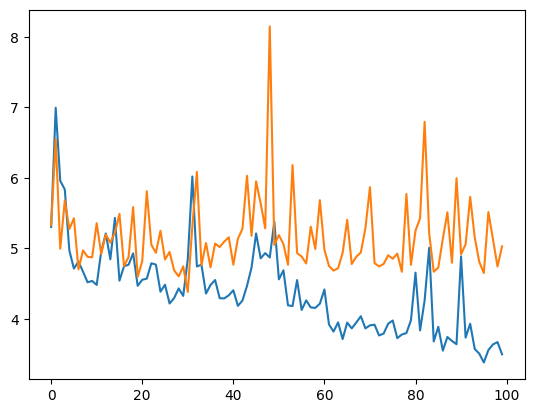

In [19]:
plt.plot(history.history['loss'][200:])
plt.plot(history.history['val_loss'][200:])

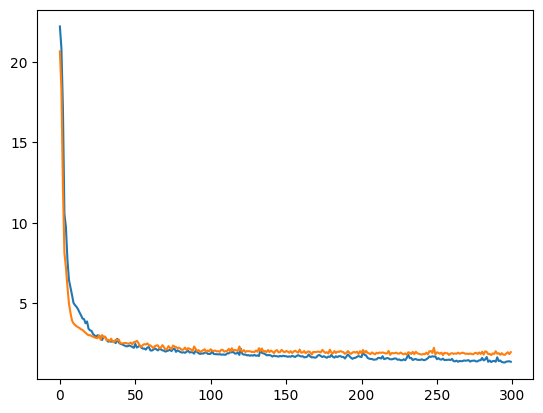

In [20]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

In [21]:
model.evaluate(test_X,test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 33.2755 - mae: 4.6676


[33.275516510009766, 4.667551040649414]

In [22]:
predictions=model.predict(test_X)

4/4 [==============================] - 0s 2ms/step


In [23]:
for i in range (len(predictions)):
    print(predictions[i],test_Y[i])

[9.50329] 7.2
[14.13473] 18.8
[18.53674] 19.0
[31.293455] 27.0
[20.064009] 22.2
[18.045534] 24.5
[24.679302] 31.2
[18.064304] 22.9
[15.105527] 20.5
[16.50219] 23.2
[18.558432] 18.6
[12.881153] 14.5
[13.057963] 17.8
[45.982002] 50.0
[14.544056] 20.8
[17.707666] 24.3
[21.881506] 24.2
[18.120415] 19.8
[13.255796] 19.1
[16.314587] 22.7
[10.560291] 12.0
[10.324413] 10.2
[17.181795] 20.0
[12.997795] 18.5
[16.244827] 20.9
[16.040113] 23.0
[24.786259] 27.5
[22.78897] 30.1
[10.230904] 9.5
[18.406929] 22.0
[16.838535] 21.2
[10.963638] 14.1
[28.758253] 33.1
[20.77614] 23.4
[9.573017] 20.1
[8.23784] 7.4
[10.479825] 15.4
[12.098124] 23.8
[16.892433] 20.1
[22.233744] 24.5
[28.220682] 33.0
[23.449852] 28.4
[7.7385216] 14.1
[38.928333] 46.7
[28.679035] 32.5
[25.356636] 29.6
[24.141048] 28.4
[14.726378] 19.8
[14.600416] 20.2
[19.551598] 25.0
[31.281681] 35.4
[15.861521] 20.3
[9.000231] 9.7
[12.84211] 14.5
[31.799347] 34.9
[23.827953] 26.6
[6.781066] 7.2
[46.97108] 50.0
[30.140465] 32.4
[18.232822] 21.6